# Neural Network Assignment 1
## Name: Abdelrahman Mohamed Abdelhamid Ali Elbehery
## Section : 2
## ID : 1300759

---

## `FFNN` class

The class `FFNN` implements a feed-forward neural network, the class is flexible and allows any activation function and any derivative per layer. 

The class also relies on the `Layer` class that represent  separate layer object. The overall class diagram for the neural network can be represented as the following

![](assets/2017-11-25-23-52-15.png)

### Class features
+ Full vector operations : the class makes use of all `numpy` based matrix vector operations
+ Supports mean squared error and cross-entropy with output `softmax()` as cost function
+ Supports batch operations \[vectorized\]
+ Features a flexible number of fully connected stack of layers given at instantiation time
+ Each layer can have its own activation function for flexibility 

### Notation used inside the code

A neuron is defined as the following block

![](assets/2017-11-25-23-59-44.png)

Such that

+ `In` : the input coming from a previous layer
+ `W` : weight 
+ `F_net` : the multiply-accumulate function i.e. `W*IN`
+ `NET_u` : dot product scaler result that will be then given to the non-linear activation function
+ `f_act` : the nonlinear activation function of a neuron


### Back-propagation rules


The output layer update rule for the **mean squared error** is defined as the following

![](assets/2017-11-26-00-04-48.png)

+ `L` : a training example out of the data set
+ `o_u` : the label from the data set for the item `L`
+ `out_u` : the output neuron output for the current input
+ `d(out_u)/d(net_u)` : the derivative of the neuron output w.r.t the scaler `net_u` i.e. the derivative of the activation function

and for the cross-entropy with `softmax` as output activation function the output layer update rules are

![](assets/2017-11-26-00-14-31.png)

and for the hidden neurons the update rule is fixed whatever the loss function was, it is defined by the following rule

![](assets/2017-11-26-00-15-44.png)

At the `Layer.py` class implementation the update rules are

The delta term for the output layer is calculated by the following code section

```python
def calc_delta_out(self, target_vect):
    if self.cost_funct == 'mse':
        # mean squared error output delta calculation
        self.delta_vector = (target_vect - self.out_vector)*self.f_act_d(self.net)
    elif self.cost_funct == 'ce':
        # cross entropy error output delta calculation
        self.delta_vector = (target_vect - self.out_vector)
```

and for the hidden layers

```python
def calc_delta_hidden(self, succ_layer):
    """
    Calculate the delta terms of the hidden layers
    ### args
    - past_layer : the succ. layer object
    """
    self.delta_vector = np.dot(succ_layer.weight_matrix[:, 1:].T,
                                succ_layer.delta_vector)*self.f_act_d(self.net)

```

And the weight update rule for any neuron is calculated by the following code section

```python
def update_weights(self):
    """
    updates all the weights of the neural network
    """
    # broadcast
    # Sum the inputs in case of batch training
    self.weight_matrix += 1.0/self.batch_size*self.eta*np.dot(self.delta_vector, self.input_vector.T)
```

Notice `self.weight_matrix +=` since all the delta terms are flipped to ensure they are already negative when multiplied


### Testing the neural network against `Cifar-10`

A neural network is defined by the following parameters

```python
TRAIN_SIZE = 7000
TEST_SIZE = 700
# Train for 30 epochs
EPOCHS = 30
# each iteration use a batch of 2 items
BATCH_SIZE = 2
# learning rate 1e-2
LR = 1e-2 

# create NN object with 2 hidden layers each with 50 neurons
NN = FFNN([3072, 50, 50, 10], batch=BATCH_SIZE, eta=LR, cost_funct='ce')
```

The network accuracy output is shown in the next drawing

![](assets/2017-11-26-00-24-36.png)

Notice an accuracy of **30.142%** is achieved with this neural network.

The code is listed below

Epoch : 0
Accuracy:  8.0 %
Epoch : 1
Accuracy:  8.0 %
Epoch : 2
Accuracy:  8.0 %
Epoch : 3
Accuracy:  8.0 %
Epoch : 4
Accuracy:  10.0 %
Epoch : 5
Accuracy:  10.8571428571 %
Epoch : 6
Accuracy:  17.8571428571 %
Epoch : 7
Accuracy:  18.5714285714 %
Epoch : 8
Accuracy:  19.4285714286 %
Epoch : 9
Accuracy:  19.2857142857 %
Epoch : 10
Accuracy:  20.2857142857 %
Epoch : 11
Accuracy:  20.2857142857 %
Epoch : 12
Accuracy:  20.4285714286 %
Epoch : 13
Accuracy:  20.2857142857 %
Epoch : 14
Accuracy:  20.5714285714 %
Epoch : 15
Accuracy:  21.5714285714 %
Epoch : 16
Accuracy:  21.2857142857 %
Epoch : 17
Accuracy:  21.7142857143 %
Epoch : 18
Accuracy:  21.8571428571 %
Epoch : 19
Accuracy:  21.7142857143 %
Epoch : 20
Accuracy:  21.0 %
Epoch : 21
Accuracy:  21.1428571429 %
Epoch : 22
Accuracy:  21.2857142857 %
Epoch : 23
Accuracy:  21.5714285714 %
Epoch : 24
Accuracy:  21.4285714286 %
Epoch : 25
Accuracy:  22.5714285714 %
Epoch : 26
Accuracy:  23.7142857143 %
Epoch : 27
Accuracy:  23.7142857143 %
Epoc

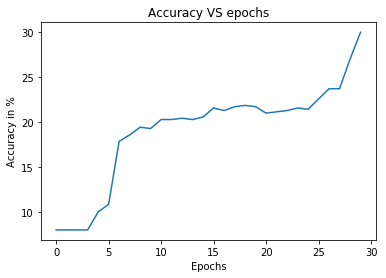

In [7]:
"""
Cifar-10 neural network based classifier

Dependencies
    - FFNN.py
"""

from FFNN import FFNN
from cifar_init import init_data
import numpy as np
import pylab
################################
### Training variables
TRAIN_SIZE = 7000
TEST_SIZE = 700
# Train for 30 epochs
EPOCHS = 30
# each iteration use a batch of 2 items
BATCH_SIZE = 2
# learning rate 1e-2
LR = 1e-2

# create NN object with 2 hidden layers each with 50 neuron
NN = FFNN([3072, 50, 50, 10], batch=BATCH_SIZE, eta=LR, cost_funct='ce')
################################

DATASET_DIR = 'F:\\Handasa\\Computer\\4th 7asbat\\Neural Networks\\labs\\KNN\\cifar-10-batches-py'
X_TRAIN, Y_TRAIN, X_TEST, Y_TEST, CLASSES = \
        init_data(num_samples=TRAIN_SIZE, num_test=TEST_SIZE, cifar10_dir=DATASET_DIR)

# converting output into one hot encoding
Y_TRAIN = np.eye(10, 10)[Y_TRAIN]
Y_TEST = np.eye(10, 10)[Y_TEST]

Y_AXIS = np.zeros([EPOCHS])

for i in range(EPOCHS):
    for j in range(0,TRAIN_SIZE,BATCH_SIZE):
        mini_batch_in = X_TRAIN[j:j+BATCH_SIZE, :].T
        mini_batch_target = Y_TRAIN[j:j+BATCH_SIZE, :].T
        NN.train_step(mini_batch_in, mini_batch_target)

    # shuffle/epoch logic is not implemented
    print ("Epoch :", i)
    acc = 0.0
    for jj in range(0,TEST_SIZE,BATCH_SIZE):
        acc += NN.test_acc(X_TEST[jj:jj+BATCH_SIZE,:].T, Y_TEST[jj:jj+BATCH_SIZE,:].T)

    acc = 100*acc/TEST_SIZE
    print ("Accuracy: ", acc, "%")
    Y_AXIS[i] = acc


pylab.plot(Y_AXIS)
pylab.xlabel("Epochs")
pylab.ylabel("Accuracy in %")
pylab.title('Accuracy VS epochs')
pylab.show()


## Cifar 10 initiallization and NN creation function [Keras]
The next code loads the cifar-10 dataset, and attempts to divide the returned test data into `50%` validation and `50%` test

The code defines the function that trains and plots both error and accuracy during the training; a neural network with **two** hidden layers is created, the number of neurons at each layer is given as an argument for testing purposes.

Note the code below is using a softmax output activation function not a sigmoid, with a cross-entropy error function

In [6]:
"""
Code that simulates a FFNN with two hidden layer
to classify cifar-10 data set

Assumes the data-set location is given and set correctly
In my case it is located at 'user\.keras\datasets\cifar-10-batches-py'
"""

import os
import time
import keras
import numpy as np
from keras.datasets import cifar10
from keras.layers import Activation, Dense, regularizers, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
import pylab

#### Loading data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

### One hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# 50% validation, 50% test
x_valid = x_test[:5000, :]
y_valid = y_test[:5000, :]

x_test = x_test[5000:, :]
y_test = y_test[5000:, :]
####



### create a stack of layers
def test_nn(num_epochs=25, eta=1e-1, batch_size=128, hidden_neurons=50, loss='binary_crossentropy', out_act='softmax'):
    """
    Creates a neural network FF and attempts to plot the training/valid loss and acc

    args:
    + num_epochs : the number of epochs to train
    + eta : learning rate
    + batch_size : the batch size
    """

    model = Sequential()

    # create an input layer followed by 50 sigmoid neurons
    in_layer = Dense(hidden_neurons, input_dim=3072,activation='sigmoid')
    model.add(in_layer)

    # 2nd hidden layer of 50 sigmoid neurons
    model.add(Dense(hidden_neurons,activation='sigmoid'))
    # output layer with 10 softmax neurons
    model.add(Dense(10, activation=out_act))

    # optimizer object, with eta
    sgd = SGD(lr=eta)

    model.compile(loss=loss, optimizer=sgd, metrics=["categorical_accuracy"])
    
    t = time.time()
    # show the progress during iteration
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(x_valid, y_valid))
    elapsed = time.time() - t
    print("Training time: ", elapsed, "S")
    print ("Train acc: ", history.history['categorical_accuracy'][-1])
    print ("Validation acc: ", history.history['val_categorical_accuracy'][-1])

    pylab.plot(history.history['val_categorical_accuracy'])
    pylab.plot(history.history['categorical_accuracy'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Accuracy')
    pylab.xlabel('Epoch')
    pylab.ylabel('Accuracy')
    pylab.show()
    pylab.plot(history.history['val_loss'])
    pylab.plot(history.history['loss'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Loss')
    pylab.xlabel('Epoch')
    pylab.ylabel('Error')
    pylab.show()
    return  model.evaluate(x_test, y_test,batch_size=batch_size, verbose=0)

In the next section i will check the network performance for different hidden unit size `2,5,10,20,50,100`and a fixed learning rate = `1e-1`

#######################################
Running with hidden unit size:  2
Training time:  20.050127267837524 S
Train acc:  0.0982199999976
Validation acc:  0.1008


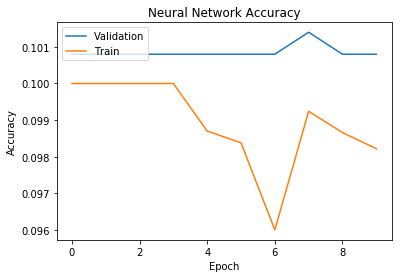

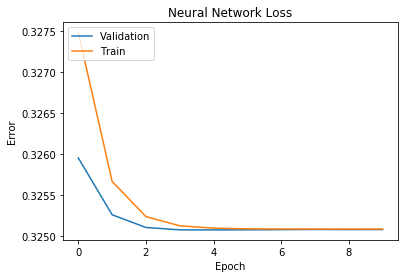

#######################################
Running with hidden unit size:  5
Training time:  20.286064863204956 S
Train acc:  0.0993000000024
Validation acc:  0.0976


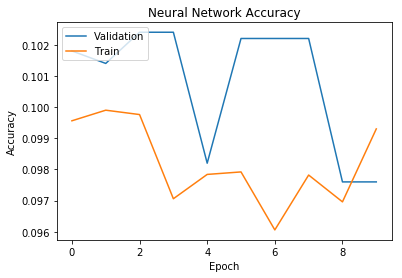

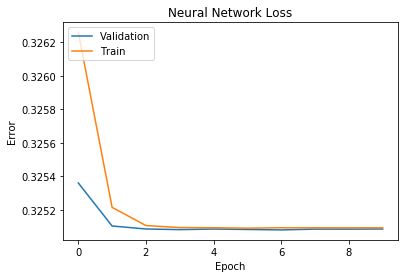

#######################################
Running with hidden unit size:  10
Training time:  20.61851477622986 S
Train acc:  0.1572
Validation acc:  0.156


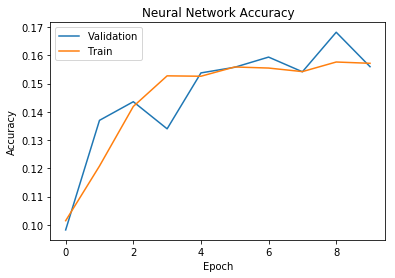

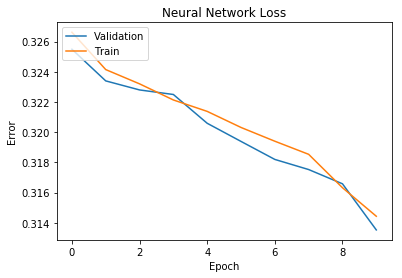

#######################################
Running with hidden unit size:  20
Training time:  20.8368980884552 S
Train acc:  0.17349999999
Validation acc:  0.1714


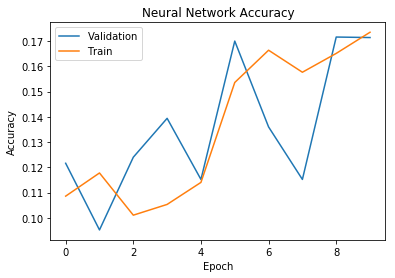

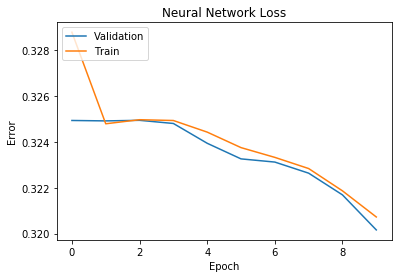

#######################################
Running with hidden unit size:  50
Training time:  21.09919047355652 S
Train acc:  0.23733999999
Validation acc:  0.2588


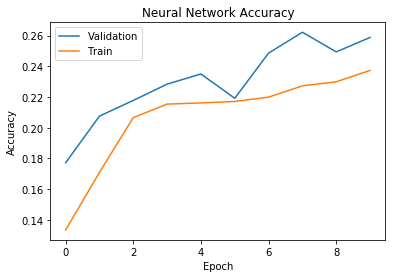

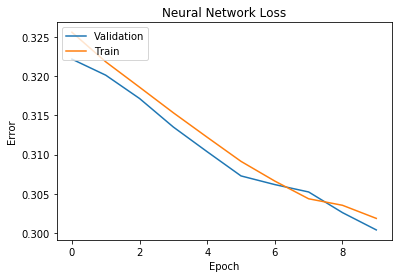

#######################################
Running with hidden unit size:  100
Training time:  22.10039210319519 S
Train acc:  0.277619999981
Validation acc:  0.278


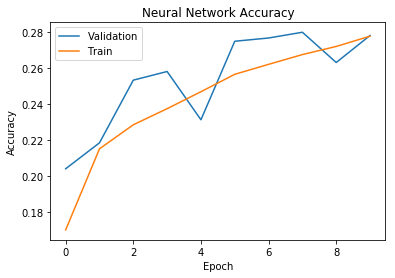

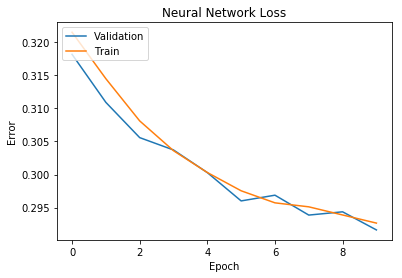

In [5]:
hidden_unit_size = [2,5,10,20,50,100]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict = {}
for i in hidden_unit_size:
    print ("#######################################")
    print ("Running with hidden unit size: ", str(i))
    result_dict[i] = test_nn(num_epochs = 10, hidden_neurons=i, eta=1e-1)

In [6]:
for i in result_dict:
    print ("Num neurons: ", i, "Error: ", result_dict[i][0], "Test Acc: ", result_dict[i][1]*100)

Num neurons:  2 Error:  0.325084526634 Test Acc:  9.92
Num neurons:  5 Error:  0.325081695986 Test Acc:  10.24
Num neurons:  10 Error:  0.313889309406 Test Acc:  16.48
Num neurons:  20 Error:  0.320348624516 Test Acc:  16.74
Num neurons:  50 Error:  0.300615051842 Test Acc:  24.74
Num neurons:  100 Error:  0.291949299145 Test Acc:  27.02


The table below summarize the error and accuracy vs different number of hidden units when testing the network against the **test data**

Number of neurons | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
2 | 21.7 | `9.7%`| `10%`| `10%`| 
5 | 20.7 | `11%`| `13%`| `10%`| 
10 | 21 | `12%`| `13%`| `13%`| 
20 | 21.7 | `12%`| `9.7%`| `19%`| 
50 | 21.3 | `23%`| `24%`| `23%`| 
100 | 21.9 | `28%`| `26%`| `25%`| 

In the next section i will be trying different learning rates for number of neurons = `100` at each hidden layer


#######################################
Running with Learnin rate:  0.1
Training time:  22.01869535446167 S
Train acc:  0.27793999999
Validation acc:  0.2776


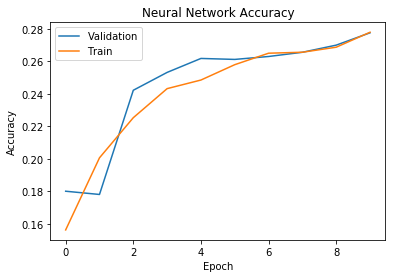

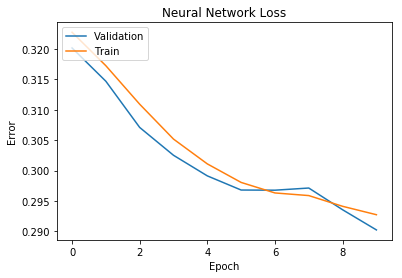

#######################################
Running with Learnin rate:  0.01
Training time:  21.389063119888306 S
Train acc:  0.26778000001
Validation acc:  0.2792


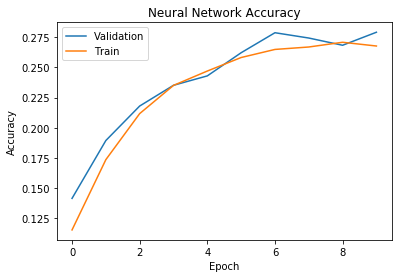

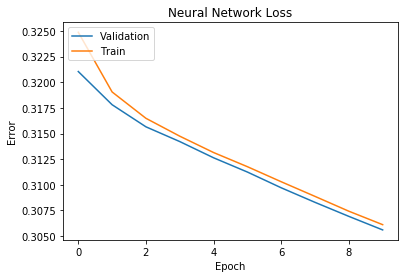

#######################################
Running with Learnin rate:  0.001
Training time:  21.15443778038025 S
Train acc:  0.15524000001
Validation acc:  0.1608


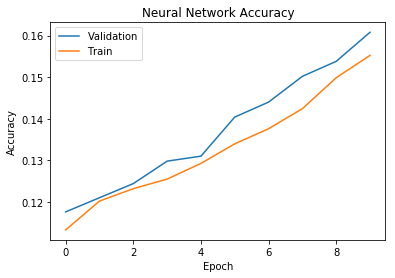

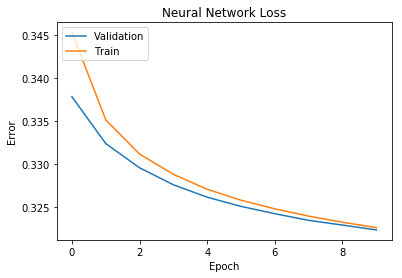

In [7]:
LR = [1e-1,1e-2,1e-3]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict2 = {}
for i in LR:
    print ("#######################################")
    print ("Running with Learnin rate: ", str(i))
    result_dict2[i] = test_nn(num_epochs = 10, hidden_neurons=100, eta=i)

In [12]:
for i in result_dict2:
    print ("Eta: ", i, "Error: ", result_dict2[i][0], "Test Acc: ", result_dict2[i][1]*100)

Eta:  0.1 Error:  0.290702266979 Test Acc:  28.1
Eta:  0.01 Error:  0.306053957701 Test Acc:  27.46
Eta:  0.001 Error:  0.322458650112 Test Acc:  15.66


The table below summarize the error and accuracy vs different learning rates when testing the network against the **test data**

Learning rate | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
`1e-1` | 22.5 | `27%`| `27%`| `28%`| 
`1e-2` | 22.29 | `27%`| `26%`| `27.4%`| 
`1e-3` | 22.25 | `16%`| `15%`| `15.6%`| 

In the next section i will be trying different batch size for number of neurons = `100` at each hidden layer and eta = `0.01`


#######################################
Running with batch size:  32
Training time:  65.23670959472656 S
Train acc:  0.29124
Validation acc:  0.3024


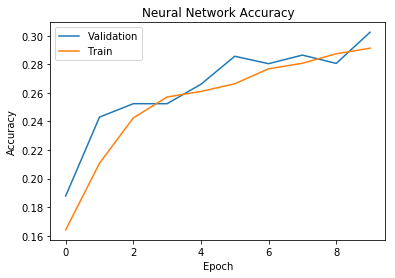

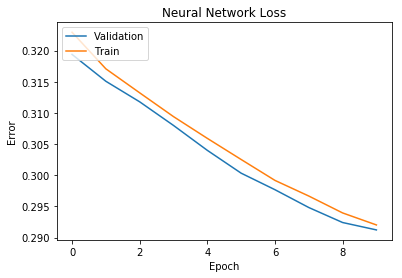

#######################################
Running with batch size:  64
Training time:  36.362409591674805 S
Train acc:  0.29568
Validation acc:  0.3084


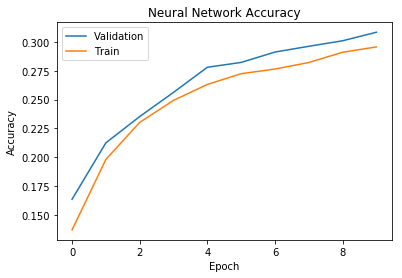

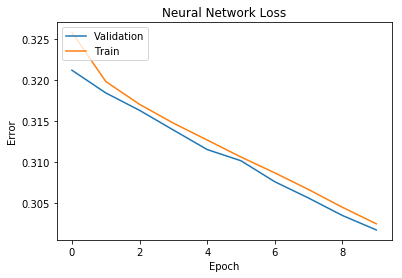

#######################################
Running with batch size:  128
Training time:  22.802948713302612 S
Train acc:  0.28718
Validation acc:  0.3006


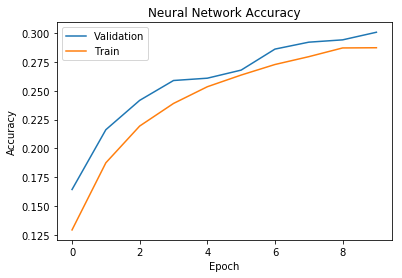

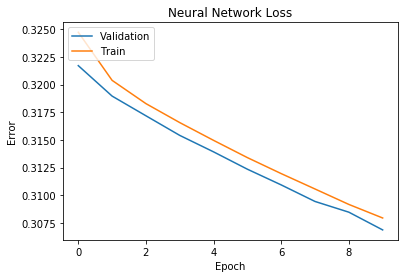

#######################################
Running with batch size:  256
Training time:  15.48096752166748 S
Train acc:  0.24266000001
Validation acc:  0.253599999762


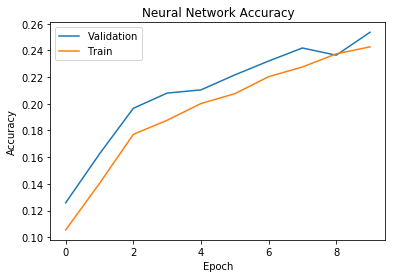

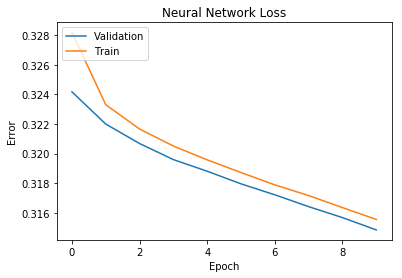

In [14]:
batch_s = [32, 64, 128, 256]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict3 = {}
for i in batch_s:
    print ("#######################################")
    print ("Running with batch size: ", str(i))
    result_dict3[i] = test_nn(num_epochs = 10, hidden_neurons=100, eta=0.01, batch_size=i)

In [15]:
for i in result_dict3:
    print ("Num Batches: ", i, "Error: ", result_dict3[i][0], "Test Acc: ", result_dict3[i][1]*100)

Num Batches:  32 Error:  0.291897470379 Test Acc:  28.28
Num Batches:  64 Error:  0.302622074556 Test Acc:  29.1
Num Batches:  128 Error:  0.307410966682 Test Acc:  28.52
Num Batches:  256 Error:  0.315056447792 Test Acc:  25.4599999809


The table below summarize the error and accuracy vs different batch size when testing the network against the **test data**

Batch Size | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
`32` | 63.44 | `30%`| `29`| `29.3%`| 
`64` | 33 | `30%`| `30%`| `29.3%`| 
`128` | 22.44 | `30%`| `28%`| `28.5%`| 
`256` | 15.34 | `25%`| `24%`| `25.5%`| 


Based on the above test cases i concluded the following
+ A number of hidden neurons = `100`
+ A learning rate of `1e-2`
+ A batch size of `64`

Seems to make a good model; i will be using these hyper parameters while varying the **L2 regularization strength** in the next test cases.

I will start by defining a modified version of the function above that supports adjustable regularization strength

In [20]:

### create a stack of layers WITH REGULARIZATION STRENGTH
def test_nn_reg(num_epochs=25, eta=1e-2, batch_size=64, hidden_neurons=100, reg_str=0.4):
    """
    Creates a neural network FF and attempts to plot the training/valid loss and acc
    with regularization

    args:
    + num_epochs : the number of epochs to train
    + eta : learning rate
    + batch_size : the batch size
    """

    model = Sequential()

    # create an input layer followed by 50 sigmoid neurons
    in_layer = Dense(hidden_neurons, input_dim=3072,activation='sigmoid', kernel_regularizer=regularizers.l2(reg_str))
    model.add(in_layer)

    # 2nd hidden layer of 50 sigmoid neurons
    model.add(Dense(hidden_neurons,activation='sigmoid', kernel_regularizer=regularizers.l2(reg_str)))
    # output layer with 10 softmax neurons
    model.add(Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(reg_str)))

    # optimizer object, with eta = 0.01
    sgd = SGD(lr=eta)

    model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["categorical_accuracy"])

    t = time.time()
    # show the progress during iteration
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(x_valid, y_valid))
    elapsed = time.time() - t
    print("Training time: ", elapsed, "S")
    print ("Train acc: ", history.history['categorical_accuracy'][-1])
    print ("Validation acc: ", history.history['val_categorical_accuracy'][-1])

    pylab.plot(history.history['val_categorical_accuracy'])
    pylab.plot(history.history['categorical_accuracy'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Accuracy')
    pylab.xlabel('Epoch')
    pylab.ylabel('Accuracy')
    pylab.show()
    pylab.plot(history.history['val_loss'])
    pylab.plot(history.history['loss'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Loss')
    pylab.xlabel('Epoch')
    pylab.ylabel('Error')
    pylab.show()
    return  model.evaluate(x_test, y_test,batch_size=batch_size, verbose=0)


#######################################
Running with regularization strength:  0.4
Training time:  34.838908672332764 S
Train acc:  0.10002
Validation acc:  0.0976


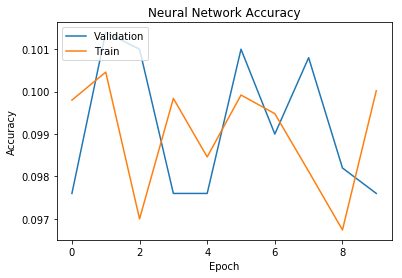

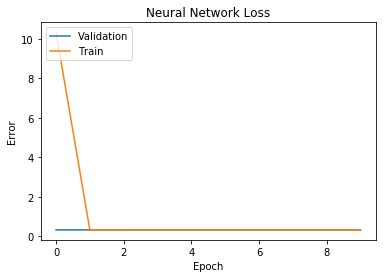

#######################################
Running with regularization strength:  0.5
Training time:  34.82094120979309 S
Train acc:  0.0985
Validation acc:  0.1026


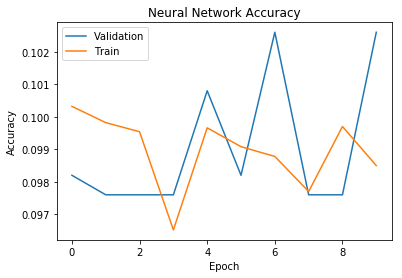

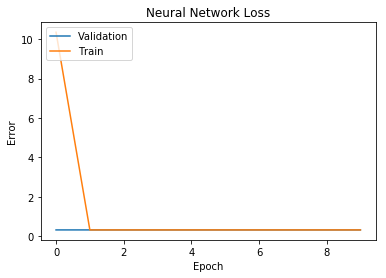

#######################################
Running with regularization strength:  0.6
Training time:  34.40120267868042 S
Train acc:  0.09668
Validation acc:  0.1014


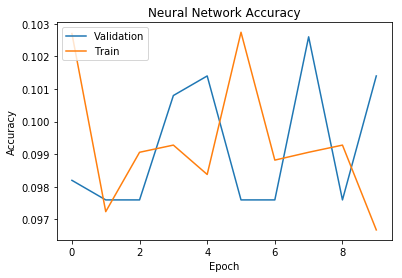

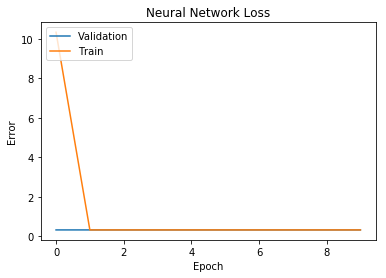

In [12]:
reg_str = [0.4, 0.5, 0.6]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict4 = {}
for i in reg_str:
    print ("#######################################")
    print ("Running with regularization strength: ", str(i))
    result_dict4[i] = test_nn_reg(num_epochs = 10, reg_str=i)

In [27]:
for i in result_dict4:
    print ("Regularization Strength: ", i, "Error: ", result_dict4[i][0], "Test Acc: ", result_dict4[i][1]*100)

Regularization Strength:  0.4 Error:  0.325090686274 Test Acc:  10.24
Regularization Strength:  0.5 Error:  0.325098625946 Test Acc:  9.74
Regularization Strength:  0.6 Error:  0.32508549366 Test Acc:  9.86


Seems like all the weight regularization strengths above produced huge error and very low accuracy, i think this is due to the following

+ A huge error is notices this means that the term `cost + lamda*sum(weights)` yeild a very big value, the `lambda*sum(weights)` seems to be very big that it dominates the small error `cost` value
+ Either initiallize weights to small initial numbers or use a very small regularization strength

The code below is based upon these observations is using a neural network with the following parameters
+ Eta = `3e-2`
+ Hidden units at each layer = `50`
+ A **VERY SMALL** regularization strength of `1e-3` is used
+ The network is trained for `40` epochs

Training time:  134.23264741897583 S
Train acc:  0.2522
Validation acc:  0.2632


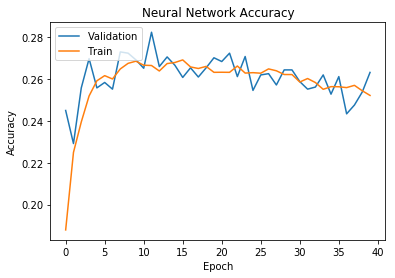

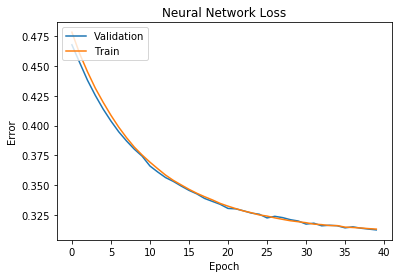

In [29]:
_err, _valid = test_nn_reg(num_epochs = 40, reg_str=1e-3, hidden_neurons=50, eta=3e-2)

In [31]:
print ("Error: ", _err, "\nTest Acc: ", _valid*100)

Error:  0.312749493265 
Test Acc:  25.18


The result seem to make sense with the above observed facts و الله اعلم

In the next section i will be trying different initial weights for number of neurons = `50` at each hidden layer and eta = `0.01`, the code below adds the initiall random weights range as an argument

In [35]:
# with random initial weights taken from uniform dist.
def test_nn_initw(num_epochs=25, eta=1e-2, batch_size=64, hidden_neurons=100, ran_w=0.4):
    """
    Creates a neural network FF and attempts to plot the training/valid loss and acc
    with regularization

    args:
    + num_epochs : the number of epochs to train
    + eta : learning rate
    + batch_size : the batch size
    """

    model = Sequential()

    # create an input layer followed by 50 sigmoid neurons
    in_layer = Dense(hidden_neurons, input_dim=3072,activation='sigmoid',kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w))
    model.add(in_layer)

    # 2nd hidden layer of 50 sigmoid neurons
    model.add(Dense(hidden_neurons,activation='sigmoid' ,kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w)))
    # output layer with 10 softmax neurons
    model.add(Dense(10, activation='softmax',kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w)))

    # optimizer object, with eta = 0.01
    sgd = SGD(lr=eta)

    model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["categorical_accuracy"])

    t = time.time()
    # show the progress during iteration
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=0, validation_data=(x_valid, y_valid))
    elapsed = time.time() - t
    print("Training time: ", elapsed, "S")
    print ("Train acc: ", history.history['categorical_accuracy'][-1])
    print ("Validation acc: ", history.history['val_categorical_accuracy'][-1])

    pylab.plot(history.history['val_categorical_accuracy'])
    pylab.plot(history.history['categorical_accuracy'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Accuracy')
    pylab.xlabel('Epoch')
    pylab.ylabel('Accuracy')
    pylab.show()
    pylab.plot(history.history['val_loss'])
    pylab.plot(history.history['loss'])
    pylab.legend(['Validation', 'Train'], loc='upper left')
    pylab.title('Neural Network Loss')
    pylab.xlabel('Epoch')
    pylab.ylabel('Error')
    pylab.show()
    return  model.evaluate(x_test, y_test,batch_size=batch_size, verbose=0)


#######################################
Running with initial weights from:  -1 To 1
Training time:  69.6091742515564 S
Train acc:  0.19456
Validation acc:  0.2024


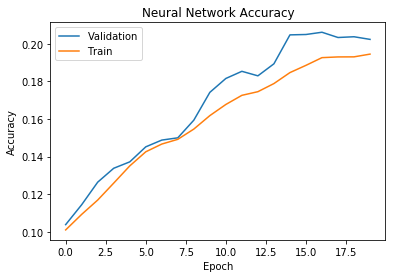

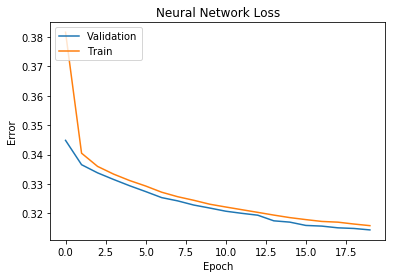

#######################################
Running with initial weights from:  -0.1 To 0.1
Training time:  71.50936985015869 S
Train acc:  0.20574
Validation acc:  0.2106


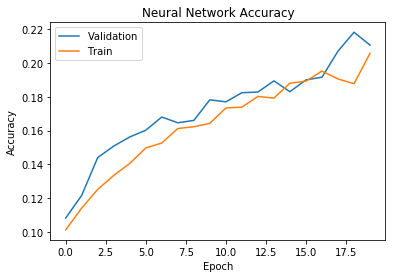

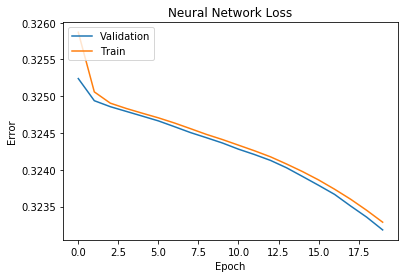

#######################################
Running with initial weights from:  -5 To 5
Training time:  72.10655093193054 S
Train acc:  0.11572
Validation acc:  0.1186


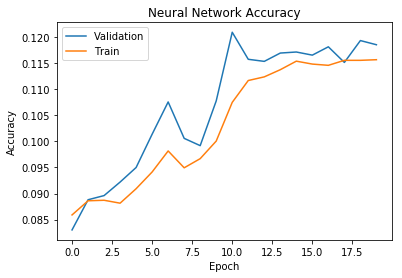

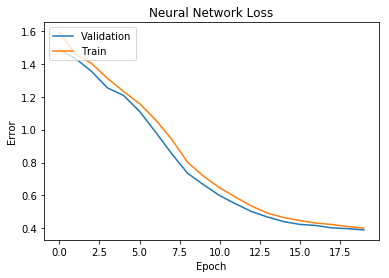

In [39]:
ran_w = [1, 0.1, 5]
# a dictionary of index => num_neurons/layer that saves (err, acc)
result_dict5 = {}
for i in ran_w:
    print ("#######################################")
    print ("Running with initial weights from: ", str(-i), "To", str(i))
    result_dict5[i] = test_nn_initw(num_epochs = 20, ran_w=i, hidden_neurons=50)

In [44]:
for i in result_dict5:
    print ("Uniform dist. range: ", str(i)+": "+str(-i), "Error: ", result_dict5[i][0], "Test Acc: ", result_dict5[i][1]*100)

Uniform dist. range:  1: -1 Error:  0.316578329563 Test Acc:  19.4
Uniform dist. range:  0.1: -0.1 Error:  0.323302646732 Test Acc:  20.16
Uniform dist. range:  5: -5 Error:  0.399220935202 Test Acc:  11.26


The table below summarize the error and accuracy vs different uniform ditribution ranges when testing the network against the **test data**

Batch Size | Time(s) | Validation Accuracy | Train Accuracy | Test Accuracy
--- | --- | ---
`-1 : 1` | 69.6 | `20%`| `19`| `19%`| 
`-0.1 : 0.1` | 71.50 | `21%`| `20%`| `20%`| 
`-5 : 5` | 72.1 | `11%`| `11%`| `11%`| 

The more spread the distribution the more likely the `z`or`net_u` term going into the nonlinear squashing function will be huge enough that neurons will saturate and learning will become very slow in such case

### Comparing MSE and Cross entropy both are using softmax as output activation

Below a neural network is trained with a MSE error funcion, the parameters used are
+ Eta = `1e-2`
+ Number of hidden units at each layer = `50`
+ Batch size = `64`

Training time:  38.31537580490112 S
Train acc:  0.265959999995
Validation acc:  0.2722


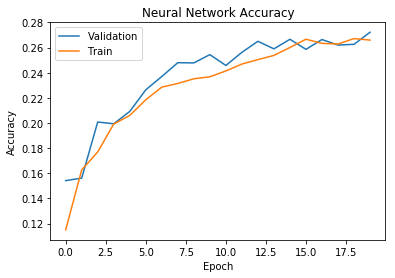

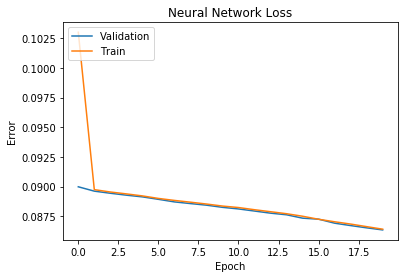

Error:  0.086440566957 
Test Acc:  26.18 
#####

Training time:  20.94497036933899 S
Train acc:  0.24983999999
Validation acc:  0.2576


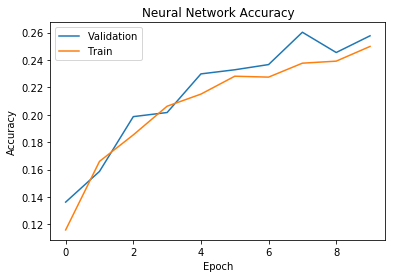

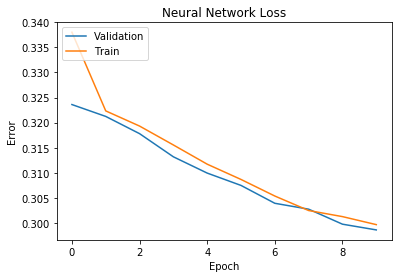

Error:  0.29859752264 
Test Acc:  25.24 
#####

Training time:  24.323829174041748 S
Train acc:  0.24538
Validation acc:  0.2516


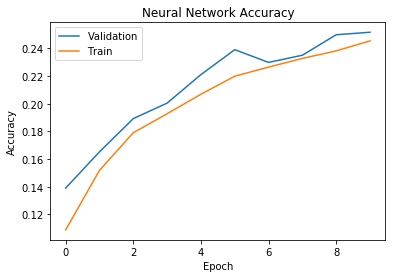

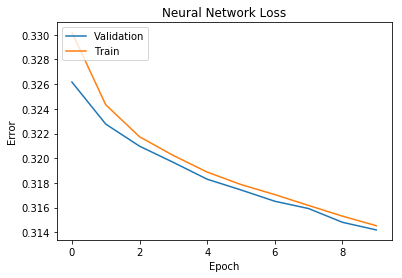

Error:  0.314297484636 
Test Acc:  24.34 
#####



In [56]:
# MSE version
_err, _valid = test_nn(num_epochs = 20, eta=1e-1, hidden_neurons=50, loss='mean_squared_error', out_act='sigmoid')
print ("Error: ", _err, "\nTest Acc: ", _valid*100,"\n#####\n")

# cross entropy with sigmoid version
_err, _valid = test_nn(num_epochs = 10, eta=1e-1, hidden_neurons=50, out_act='sigmoid')
print ("Error: ", _err, "\nTest Acc: ", _valid*100, "\n#####\n")

# cross entropy with softmax version
_err, _valid = test_nn(num_epochs = 10, eta=1e-2, hidden_neurons=50)
print ("Error: ", _err, "\nTest Acc: ", _valid*100, "\n#####\n")

It took the -**MSE** with sigmoid- double the number of epochs to out-perform both the cross-entropy based neural networks

+ Since the MSE version uses a `sigmoid` at the output layer, the derivative of the cost depends on the derivative of the activation function at the output, thus in case we started our initial guesses at values that saturate any of the output neurons, the learning rate will be slow since the update rule depends on this derivative
+ The cross entropy solved this issue by defining an error function that in the update rule no longer depend on the derivative of the activation but rather the difference between the target and desired labels


# CIFAR-10 NEURAL NETWORK WITH ACCURACY ABOVE 50%

A function with all the adjustable arguments is created and tested several times; the function creates a neural network with the following adjustable parameters
+ Number of epochs to train for
+ Learning rate
    + Note i am using Keras Gradient descent with decaying learning rate and momentum term
+ Batch size
+ Number of hidden units
+ Initial weights distribution range
+ regularization

Some of the hyper-parameters i have ended up using was
+ Drop out ratio of 0.4
+ Regularization strength of zero with small enough weight range uniform distribution between -0.002 : 0.002
+ learning rate = `2.5e-3`
+ Batch size = `512`

An image for the training result from my PC

![](assets/acc_.png)

In [4]:
def test_nn_initw(num_epochs=25, eta=1e-2, batch_size=64, hidden_neurons=100, ran_w=0.4, reg_str=0.4):
    """
    Creates a neural network FF and attempts to plot the training/valid loss and acc
    with regularization

    args:
    + num_epochs : the number of epochs to train
    + eta : learning rate
    + batch_size : the batch size
    """

    model = Sequential()

    # create an input layer followed by 50 sigmoid neurons
    in_layer = Dense(hidden_neurons, input_dim=3072,activation='relu',kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w),
                     kernel_regularizer=regularizers.l2(reg_str))
    model.add(in_layer)
    model.add(Dropout(0.4))
    # 2nd hidden layer of 50 sigmoid neurons
    model.add(Dense(hidden_neurons,activation='relu',kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w),
                    kernel_regularizer=regularizers.l2(reg_str)))
    model.add(Dropout(0.4))
    # output layer with 10 softmax neurons
    model.add(Dense(10, activation='softmax',kernel_initializer=keras.initializers.RandomUniform(-ran_w, ran_w),
                    kernel_regularizer=regularizers.l2(reg_str)))

    # optimizer object, with eta = 0.01
    #sgd = SGD(lr=eta)
    sgd = SGD(lr=eta, decay=1e-4, momentum=0.9, nesterov=True)
    model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["categorical_accuracy"])

    t = time.time()
    # show the progress during iteration
    history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, verbose=1, validation_data=(x_valid, y_valid))
    elapsed = time.time() - t
    print("Training time: ", elapsed, "S")
    print ("Train acc: ", history.history['categorical_accuracy'][-1])
    print ("Validation acc: ", history.history['val_categorical_accuracy'][-1])
    return  model.evaluate(x_test, y_test,batch_size=batch_size, verbose=0)

In [7]:
_err, test_acc = test_nn_initw(num_epochs = 100, ran_w=0.002, hidden_neurons=150, eta=2.5e-3, batch_size=512, reg_str=0*0.02) # 50.8% 
print ("Error: ", _err, "\nTest Acc: ", test_acc*100, "\n#####\n")

Train on 50000 samples, validate on 5000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.3250 - categorical_accuracy: 0.1079 - val_loss: 0.3250 - val_categorical_accuracy: 0.1070
Epoch 2/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.3244 - categorical_accuracy: 0.1017 - val_loss: 0.3225 - val_categorical_accuracy: 0.1152
Epoch 3/100
50000/50000 [==============================] - 1s 26us/step - loss: 0.3144 - categorical_accuracy: 0.1474 - val_loss: 0.3030 - val_categorical_accuracy: 0.1866
Epoch 4/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.3020 - categorical_accuracy: 0.1819 - val_loss: 0.2986 - val_categorical_accuracy: 0.1850
Epoch 5/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.2984 - categorical_accuracy: 0.1938 - val_loss: 0.2950 - val_categorical_accuracy: 0.2258
Epoch 6/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.2924 - ca

50000/50000 [==============================] - 1s 24us/step - loss: 0.2244 - categorical_accuracy: 0.4827 - val_loss: 0.2147 - val_categorical_accuracy: 0.4968
Epoch 49/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.2233 - categorical_accuracy: 0.4842 - val_loss: 0.2173 - val_categorical_accuracy: 0.5022
Epoch 50/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2231 - categorical_accuracy: 0.4848 - val_loss: 0.2133 - val_categorical_accuracy: 0.5120
Epoch 51/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2226 - categorical_accuracy: 0.4864 - val_loss: 0.2135 - val_categorical_accuracy: 0.5154
Epoch 52/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2223 - categorical_accuracy: 0.4873 - val_loss: 0.2136 - val_categorical_accuracy: 0.5120
Epoch 53/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2215 - categorical_accuracy: 0.4896 - val_loss: 0.2122 - val_cate

50000/50000 [==============================] - 1s 24us/step - loss: 0.2072 - categorical_accuracy: 0.5273 - val_loss: 0.2040 - val_categorical_accuracy: 0.5382
Epoch 96/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2063 - categorical_accuracy: 0.5300 - val_loss: 0.2058 - val_categorical_accuracy: 0.5308
Epoch 97/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2063 - categorical_accuracy: 0.5299 - val_loss: 0.2041 - val_categorical_accuracy: 0.5404
Epoch 98/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2065 - categorical_accuracy: 0.5319 - val_loss: 0.2038 - val_categorical_accuracy: 0.5352
Epoch 99/100
50000/50000 [==============================] - 1s 25us/step - loss: 0.2061 - categorical_accuracy: 0.5324 - val_loss: 0.2032 - val_categorical_accuracy: 0.5450
Epoch 100/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.2062 - categorical_accuracy: 0.5289 - val_loss: 0.2044 - val_cat

# A test accuracy of 52.4% is achieved as shown